In [1]:
# Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350


In [2]:
df = customers.join(purchases,lsuffix='_1',rsuffix='_2',how='right')
pivot_table = df.pivot_table(index = 'customer_id_2', values = 'amount', aggfunc = 'sum')
pivot_table.rename(index = {1:'Alice',2:'Bob',3:'Charlie',4:'David'}, inplace=True)
pivot_table.index.name = None

print(pivot_table)

         amount
Alice       450
Bob         500
Charlie     300


In [3]:
# Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
print(grades,'\n')
print(subjects)

   student_id  subject_id  grade
0           1         101     85
1           2         101     90
2           3         102     78
3           4         102     88
4           1         103     92
5           2         103     95
6           3         101     80
7           4         103     85 

   subject_id subject_name
0         101         Math
1         102      Science
2         103      History


In [4]:
pivot_table = grades.pivot_table(index = 'subject_id', values = 'grade', aggfunc = 'mean').astype(int)
pivot_table.rename(index = {101:'Math',102:'Science',103:'History'}, inplace = True)
pivot_table.index.name = None
pivot_table.head()

,grade
Math,85
Science,83
History,90


In [5]:
#Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [33]:
def customer(age, spending):
    if age >= 30 and spending >= 500:
        return '대상고객'

df = customers[['name','age','spending']].head()

df['result'] = df.apply(lambda x: customer(x['age'], x['spending']), axis=1)

df.head()

,name,age,spending,result
0,Alice,25,300,None
1,Bob,35,600,대상고객
2,Charlie,30,500,대상고객
3,David,40,700,대상고객
4,Eve,28,400,None


In [7]:
#Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.
import pandas as pd

# 예제 데이터프레임 생성
students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
students

,student_id,name,math_score,english_score
0,101,Alice,75,80
1,102,Bob,85,78
2,103,Charlie,88,82
3,104,David,92,88
4,105,Eve,78,90


In [8]:
def Grade(grade):
    if 80 <= grade and grade <= 90:
        return '대상'

students['result'] = students.math_score.apply(lambda x: Grade(x))

print(students)

   student_id     name  math_score  english_score result
0         101    Alice          75             80   None
1         102      Bob          85             78     대상
2         103  Charlie          88             82     대상
3         104    David          92             88   None
4         105      Eve          78             90   None


In [38]:
# Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.
from google.colab import files
# 파일 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3 (2).csv


In [40]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)


df_count = df.survived.value_counts()
df_count.rename(index = {0:'비생존자',1:'생존자'}, inplace=True)
df_count.head()

In [11]:
# Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

groupped = df.groupby('pclass')['fare'].mean().reset_index()
groupped.head()


,pclass,fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


,sex
0,1
1,0
2,1
3,0
4,1
...,...
1304,1
1305,1
1306,0
1307,0


In [52]:
# Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.

result = ['survived','sex']
df_result = df[result]
df_result['sex'].replace(['female','male'], [1,0])

df_result

,survived,sex
0,1,female
1,1,male
2,0,female
3,0,male
4,0,female
...,...,...
1304,0,female
1305,0,female
1306,0,male
1307,0,male


In [13]:
# Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.
# sibsp = 형제자매,배우자, parch = 부모,자녀

df['Family'] = df['sibsp'] + df['parch']

pivot_table = df.pivot_table(index = 'Family', values = 'survived', aggfunc = 'sum')
pivot_table

,survived
Family,
0,239
1,126
2,90
3,30
4,6
5,5
6,4
7,0
10,0


In [16]:
# Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

mean_fare_by_pclass = df.groupby('pclass')['fare'].mean()
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)


result = ['name','survived','pclass','fare','mean_fare_by_pclass']
df_result = df[result]
pd.set_option('display.width', None)  # 화면 너비 자동 조정
df_result

,name,survived,pclass,fare,mean_fare_by_pclass
0,"Allen, Miss. Elisabeth Walton",1,1,211.3375,87.508992
1,"Allison, Master. Hudson Trevor",1,1,151.5500,87.508992
2,"Allison, Miss. Helen Loraine",0,1,151.5500,87.508992
3,"Allison, Mr. Hudson Joshua Creighton",0,1,151.5500,87.508992
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,1,151.5500,87.508992
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",0,3,14.4542,13.302889
1305,"Zabour, Miss. Thamine",0,3,14.4542,13.302889
1306,"Zakarian, Mr. Mapriededer",0,3,7.2250,13.302889
1307,"Zakarian, Mr. Ortin",0,3,7.2250,13.302889


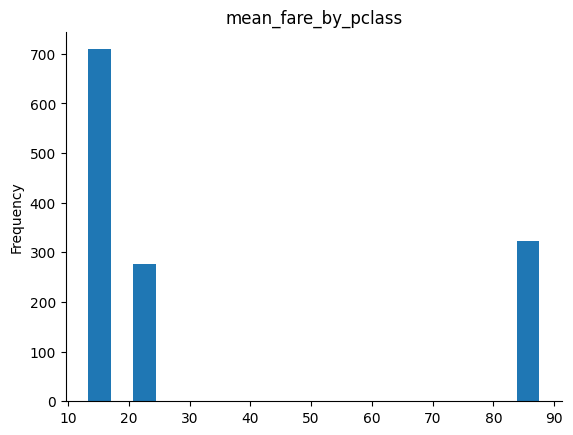

In [18]:
# @title mean_fare_by_pclass

from matplotlib import pyplot as plt
df_result['mean_fare_by_pclass'].plot(kind='hist', bins=20, title='mean_fare_by_pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

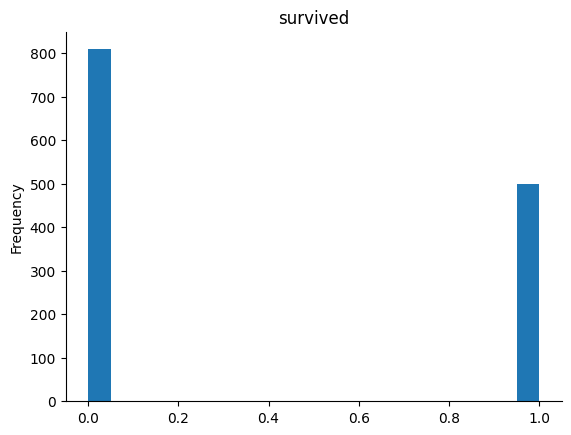

In [17]:
# @title survived

from matplotlib import pyplot as plt
df_result['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)